Sales Forecasting Store - Item 

In [ ]:
#Loading libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# FOR GOOGLE COLAB 
## comment this block when program is on local machine 
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#gpu_info = !nvidia-smi
#gpu_info = '\n'.join(gpu_info)
#if gpu_info.find('failed') >= 0:
 # print('Not connected to a GPU')
#else:
 # print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 7.9 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
#df = pd.read_csv(r"C:\Users\Geethu Bennyson\Desktop\Sales Forecasting Thesis\Retail_Store_Dataset.csv")
path= "C:\\Users\\Geethu Bennyson\\Downloads\\train.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
df['date']= pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [ ]:
df.isna().any()

date     False
store    False
item     False
sales    False
dtype: bool

In [ ]:
df.shape

(913000, 4)

Visualisation

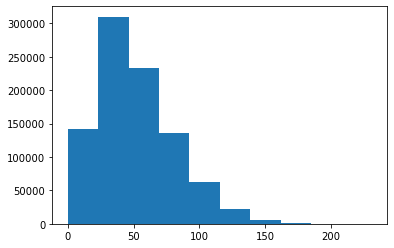

In [ ]:
# Histogram - Sales of an product  histogram

plt.hist(df["sales"])
plt.show()

In [ ]:
#Sales growth monthly

#M_Sales = df.groupby(["M_Y"], as_index=False)
#Mean_M_Sales = M_Sales[["Sales"]].mean()
#Mean_M_Sales["Index"] = Mean_M_Sales.index
#M_Plot = sns.relplot(y="Sales", x="Index", data = Mean_M_Sales, kind="line")


In [ ]:
#Sales yearly growth

#Y_Sales = df.groupby(["Year"],as_index= False)
#Mean_Y_Sales = Y_Sales[["Sales"]].mean()
#Mean_Y_Sales["Index"] = Mean_Y_Sales.index
#Y_Plot = sns.relplot(y="Sales", x="Index", data = Mean_Y_Sales, kind="line")


#Prophet Modelling


In [ ]:
Store1 = df[(df["store"]==1) & (df["item"])==1]


In [ ]:
Store1["sales"] = np.log1p(Store1["sales"])

In [ ]:
Store1.tail()

,date,store,item,sales
878301,2017-12-27,1,49,2.890372
878302,2017-12-28,1,49,3.091042
878303,2017-12-29,1,49,3.178054
878304,2017-12-30,1,49,3.401197
878305,2017-12-31,1,49,3.091042


In [ ]:
S1 = Store1[["date", "sales"]]
S1.columns = ["ds", "y"]
S1.head()

,ds,y
0,2013-01-01,2.639057
1,2013-01-02,2.484907
2,2013-01-03,2.708050
3,2013-01-04,2.639057
4,2013-01-05,2.397895


In [ ]:
Model = Prophet()
Model.fit(S1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
Store1_Future = Model.make_future_dataframe(periods=365)
Store1_Future.tail()

,ds
2186,2018-12-27
2187,2018-12-28
2188,2018-12-29
2189,2018-12-30
2190,2018-12-31


In [ ]:
Store1_Forecast = Model.predict(Store1_Future)
Store1_Forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2186,2018-12-27,3.540598,2.880469,4.213606
2187,2018-12-28,3.603265,2.992627,4.242767
2188,2018-12-29,3.666123,3.019593,4.296928
2189,2018-12-30,3.721433,3.054122,4.373960
2190,2018-12-31,3.317985,2.623625,3.971395


# Future Prediction from 2018 till 2019

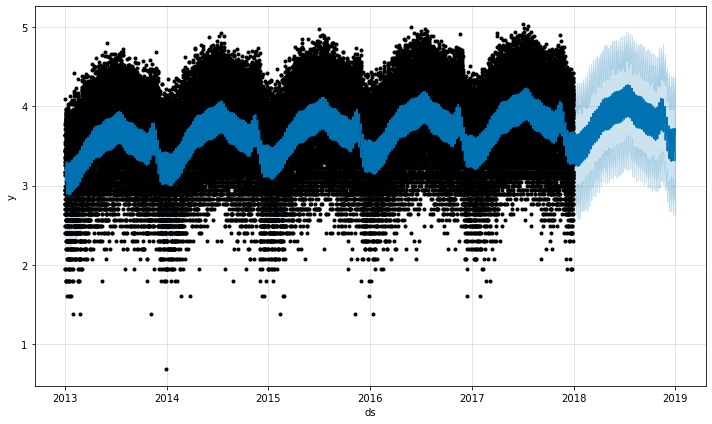

In [ ]:
Store1_fig1 = Model.plot(Store1_Forecast) # result

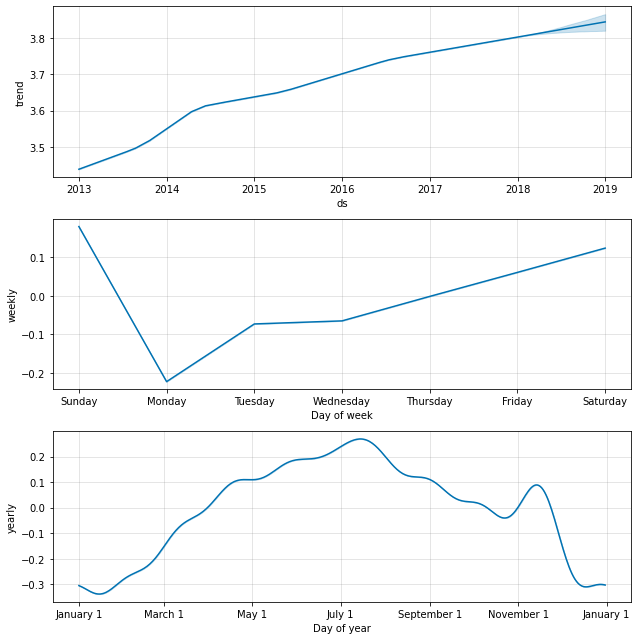

In [ ]:
Store1_fig2 = Model.plot_components(Store1_Forecast)

In [ ]:
# We can see that sales drop from Sunday to Monday, ie effect of holiday
# Also we can see that there is a peak in sales in the months of July, August, December ie Seasonal Sales or Summer Festivities. 

In [ ]:
Playoff_Holidays = ['2013-07-12', '2014-07-12', '2014-07-19',
                 '2014-07-02', '2015-07-11', '2016-07-17',
                 '2016-07-24', '2016-07-07','2016-07-24',
            '2013-08-31','2014-08-31','2015-08-31',
           '2016-08-31','2017-08-31']

In [ ]:
Playoff = pd.DataFrame({
  'holiday': 'Playoff_Holidays',
  'ds': pd.to_datetime(Playoff_Holidays),
  'lower_window': 0,
  'upper_window': 1,
})


In [ ]:
Superbowl_Holidays = ['2013-01-01', '2013-12-25', '2014-01-01', '2014-12-25','2015-01-01', '2015-12-25','2016-01-01', '2016-12-25',
                '2017-01-01', '2017-12-25']

In [ ]:
Superbowl = pd.DataFrame({
  'holiday': 'Superbowl_Holidays',
  'ds': pd.to_datetime(Superbowl_Holidays),
  'lower_window': 0,
  'upper_window': 1,
})

In [ ]:
Holidays = pd.concat((Playoff, Superbowl))

In [ ]:
Final_Model= Prophet(holidays=Holidays, holidays_prior_scale=0.5,
            yearly_seasonality=4,  interval_width=0.95,
            changepoint_prior_scale=0.006, daily_seasonality=True)

In [ ]:
Final_Model.add_seasonality(name='daily', period=60, fourier_order=5)
Final_Model.fit(S1)

In [ ]:
Final_Future = Final_Model.make_future_dataframe(periods=90, freq="D") # Daily frequency

In [ ]:
Final_Future.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [ ]:
Final_Forecast = Final_Model.predict(Final_Future)
Final_Forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1911,2018-03-27,3.740133,2.706605,4.779563
1912,2018-03-28,3.752297,2.745017,4.675054
1913,2018-03-29,3.820130,2.844952,4.809859
1914,2018-03-30,3.887140,2.836824,4.896300
1915,2018-03-31,3.954090,3.013705,4.946469


In [ ]:
Final_Forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Playoff_Holidays,Playoff_Holidays_lower,Playoff_Holidays_upper,Superbowl_Holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,2.798950,2.035792,3.991977,2.798950,2.798950,0.0,0.0,0.0,0.005351,...,-0.072813,-0.072813,-0.072813,-0.335686,-0.335686,-0.335686,0.0,0.0,0.0,3.035734
1,2013-01-02,2.799250,2.033768,4.101935,2.799250,2.799250,0.0,0.0,0.0,0.039777,...,-0.065215,-0.065215,-0.065215,-0.338796,-0.338796,-0.338796,0.0,0.0,0.0,3.074948
2,2013-01-03,2.799549,2.084457,4.166531,2.799549,2.799549,0.0,0.0,0.0,0.000000,...,-0.001917,-0.001917,-0.001917,-0.341585,-0.341585,-0.341585,0.0,0.0,0.0,3.095980
3,2013-01-04,2.799849,2.145976,4.129068,2.799849,2.799849,0.0,0.0,0.0,0.000000,...,0.060589,0.060589,0.060589,-0.344051,-0.344051,-0.344051,0.0,0.0,0.0,3.156321
4,2013-01-05,2.800149,2.216873,4.173877,2.800149,2.800149,0.0,0.0,0.0,0.000000,...,0.123067,0.123067,0.123067,-0.346192,-0.346192,-0.346192,0.0,0.0,0.0,3.216957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,2018-03-27,3.182927,2.706605,4.779563,3.181740,3.183903,0.0,0.0,0.0,0.000000,...,-0.072813,-0.072813,-0.072813,-0.009914,-0.009914,-0.009914,0.0,0.0,0.0,3.740133
1912,2018-03-28,3.183074,2.745017,4.675054,3.181870,3.184061,0.0,0.0,0.0,0.000000,...,-0.065215,-0.065215,-0.065215,-0.005495,-0.005495,-0.005495,0.0,0.0,0.0,3.752297
1913,2018-03-29,3.183221,2.844952,4.809859,3.181996,3.184219,0.0,0.0,0.0,0.000000,...,-0.001917,-0.001917,-0.001917,-0.001106,-0.001106,-0.001106,0.0,0.0,0.0,3.820130
1914,2018-03-30,3.183368,2.836824,4.896300,3.182119,3.184382,0.0,0.0,0.0,0.000000,...,0.060589,0.060589,0.060589,0.003250,0.003250,0.003250,0.0,0.0,0.0,3.887140


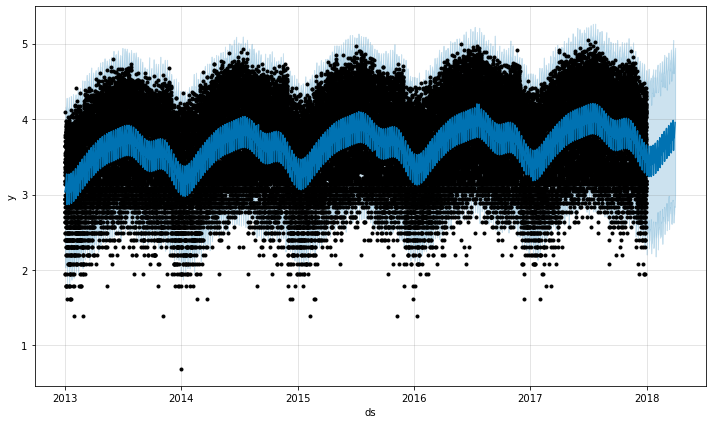

In [ ]:
Final_Store1_Fig1 = Final_Model.plot(Final_Forecast) # result 

In [ ]:
preds= Final_Forecast.yhat#[:-365]

In [ ]:
preds

0       3.035734
1       3.074948
2       3.095980
3       3.156321
4       3.216957
          ...   
1911    3.740133
1912    3.752297
1913    3.820130
1914    3.887140
1915    3.954090
Name: yhat, Length: 1916, dtype: float64

In [ ]:
treads=Final_Forecast.ds#[:-365]
treads

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1911   2018-03-27
1912   2018-03-28
1913   2018-03-29
1914   2018-03-30
1915   2018-03-31
Name: ds, Length: 1916, dtype: datetime64[ns]

In [ ]:
one= S1.y[:-43734]

# Prediction vs Actual 

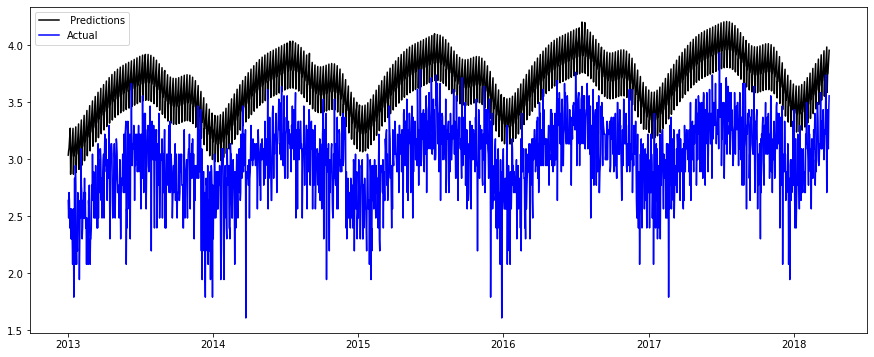

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(treads,preds,color='black',label=' Predictions')
plt.plot(Final_Forecast.ds,one,color='blue',label='Actual')
plt.legend()
plt.show()

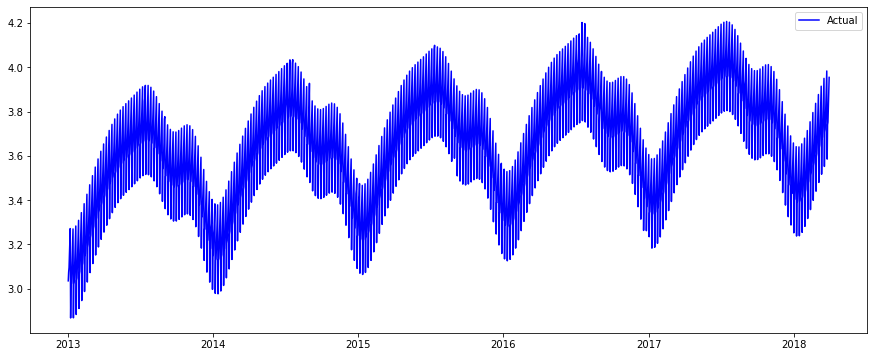

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(Final_Forecast.ds,Final_Forecast.yhat,color='blue',label='Actual')
plt.legend()
plt.show()

 from the above actual vs predicted we can tell that the Prophet is pretty close compared with the actual data 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = round(mean_squared_error(one, preds), 3)
mae = round(mean_absolute_error(one, preds), 3)
#print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

MSE:  0.492
MAE:  0.661


Error Calculation 

In [ ]:
# SMAPE Calculation

In [ ]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MSE:{}'.format(mean_squared_error(one,preds))) #  x_train and your predictin 

def error(train, pred):
    mape = np.mean(abs((train-pred)/train))*100
    smape = np.mean((np.abs(pred - train) * 200/ (np.abs(pred) + np.abs(train))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

error(one,preds) #the x_train and your predict

MSE:0.49233813893501366
MAPE: 23.39 % 
SMAPE: 18.68 %


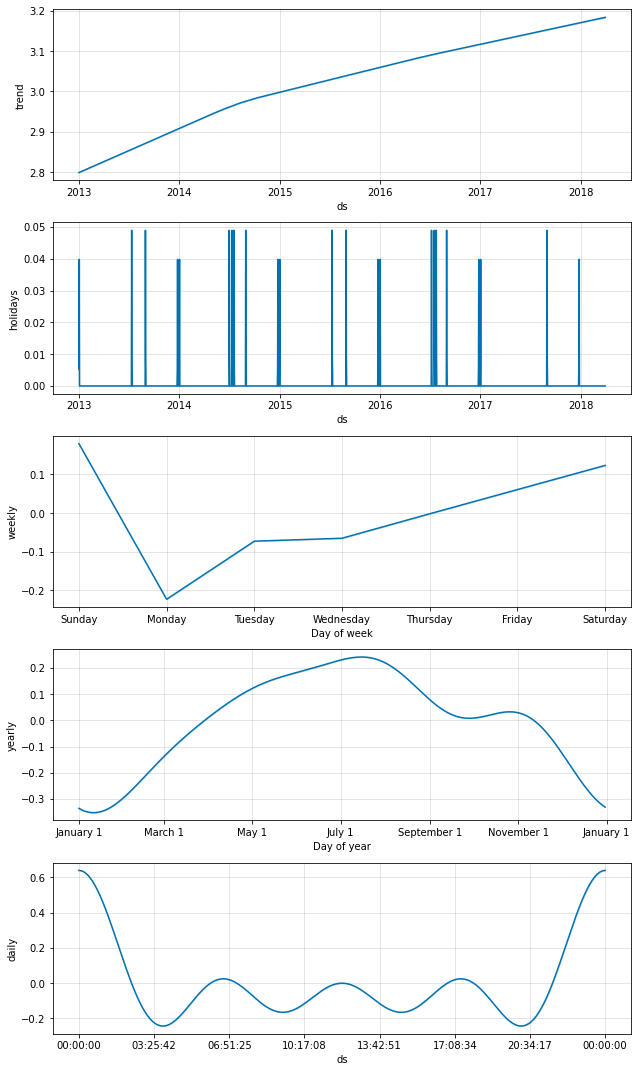

In [ ]:
Final_Store1_Fig2 = Final_Model.plot_components(Final_Forecast)


# Conclusion from Prophet

 Prophet algorithm performs well as compared with the ARIMA and SARIMA, LSTM